In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.rename(columns={'medv': 'target'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<Axes: >

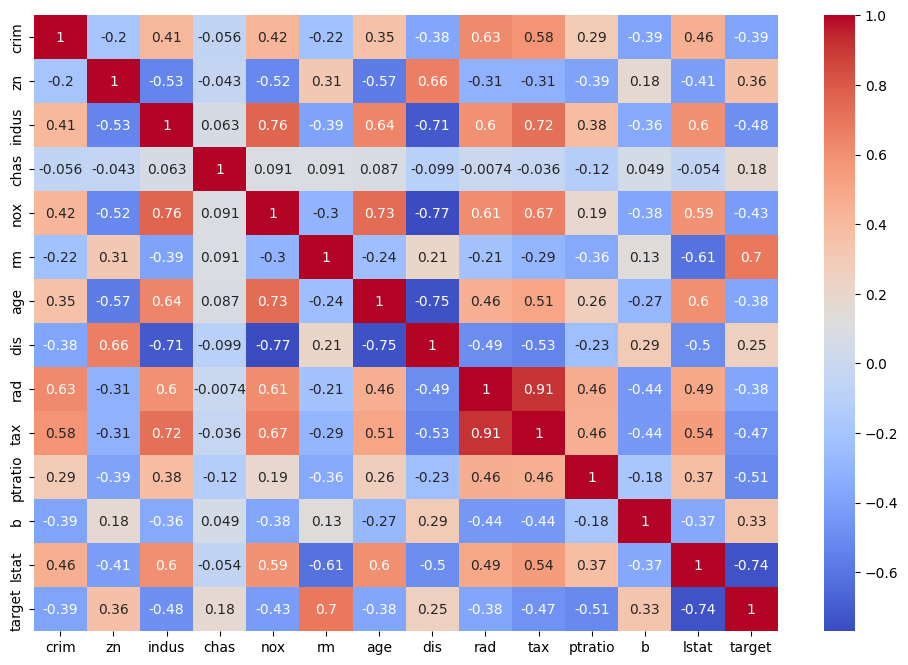

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot =True, cmap='coolwarm')

In [12]:
train_df=df[['lstat','rm','tax','indus','target']]

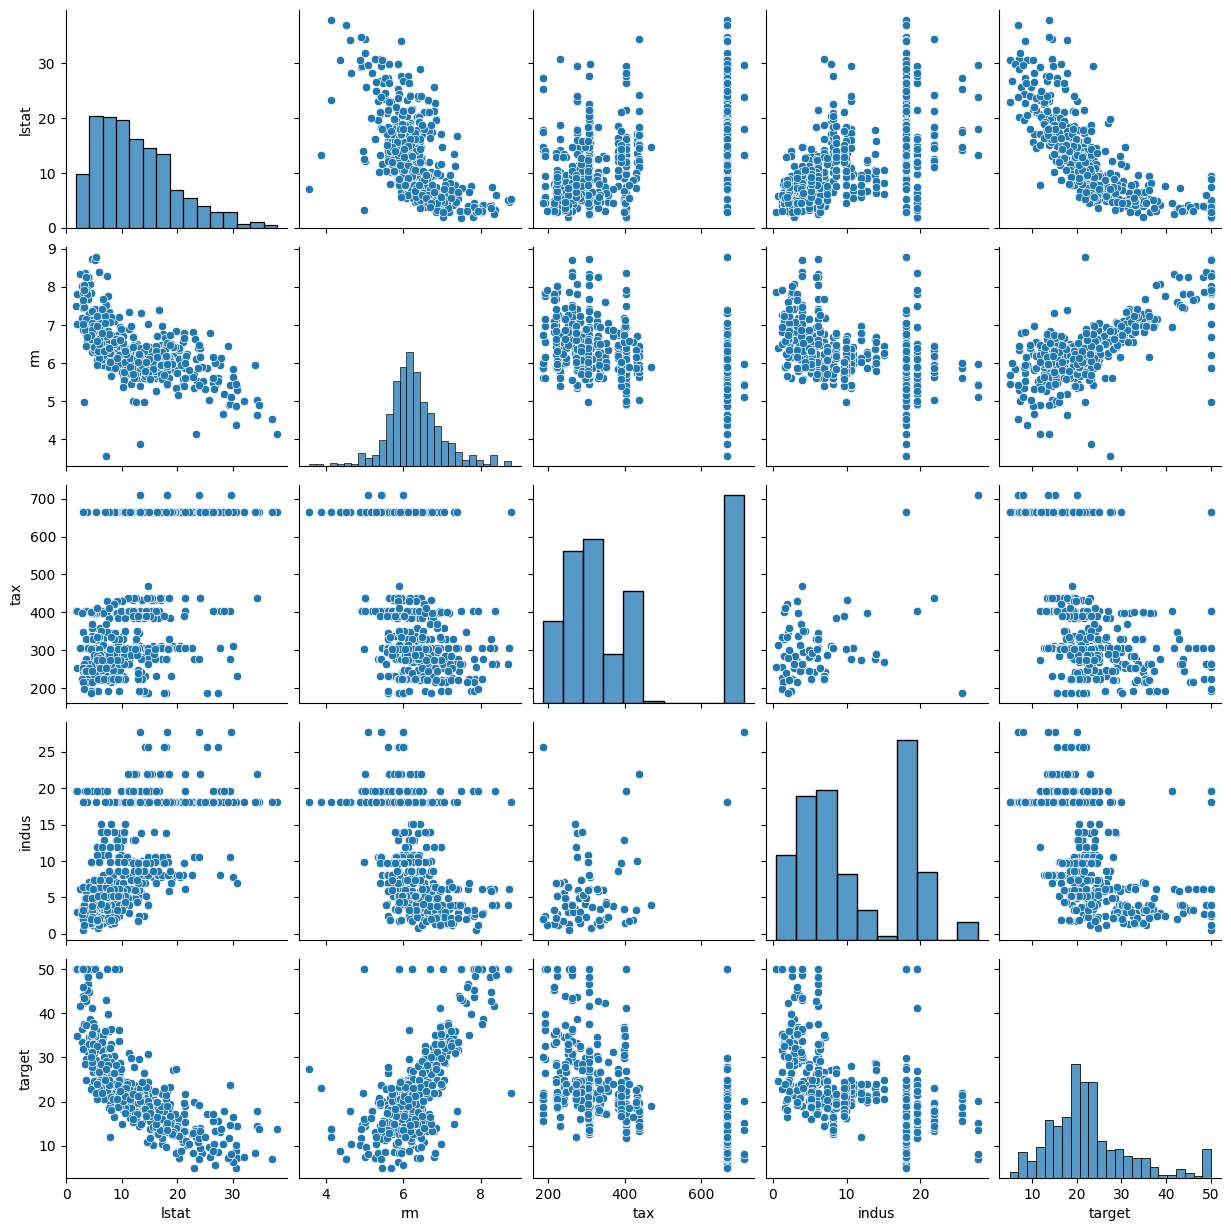

In [13]:
sns.pairplot(train_df)
plt.show()

In [32]:
x=train_df[['lstat','rm','tax','indus']]
y=train_df['target']

In [33]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [53]:

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 4), (102, 4), (404,), (102,))

In [54]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=model.predict(x_test)

In [56]:
y_pred[:5]

array([24.26538946, 19.61802446, 21.46726256, 24.11306769, 21.00661564])

In [57]:
y_test[:5]

463    20.2
124    18.8
150    21.5
242    22.2
420    16.7
Name: target, dtype: float64

In [58]:
mean_absolute_error(y_test,y_pred)

3.6783702792463533

In [59]:
mean_squared_error(y_test,y_pred)

24.19055902543529

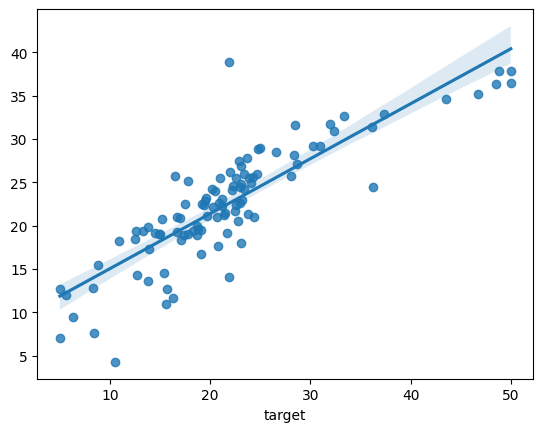

In [60]:
sns.regplot(x = y_test, y = y_pred, ci= 95);